# Ejercicio 5
## Reyes Romero Alejandro
### Instrucciones:
Aproximar la solución a la ecuación de onda con los siguientes parámetros:
1. Longitud del dominio L= 1.
2. Número de incógnitas N= 20.
3. Tiempo máximo de simulación Tmax= 1.
4. Paso de tiempo 0.05.
5. Parámetro α igual a 2.
6. Condiciones de frontera tipo Dirichlet igual a cero.
7. Condición inicial: $u(x,0) =f(x) = sin(πx)$.
8. Velocidad inicial: $g(x) = 0$

Este ejemplo tiene solución analítica igual a: $u(x,t) = sin(πx) cos(2πt)$

In [1]:
#Importamos los módulos a usar:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Funciones a utilizar:
def f(x):
    """
    Función que se va a evaluar, recibe un dominio x
    """
    return  np.sin(np.pi * x)
def g(x):
    """
    Velocidad inicial igual a cero
    """
    return 0
def  solExacta(x, t):
    """
    Calcula la solución exacta al problema, utilizando un espacio y tiempo analíticos
    """
    return  np.sin(np.pi * x) * np.cos(2 * np.pi * t)
def  calcError(sol_n , sol_e):
    """
    Calcula el error entre soluciones aproximadas y teóricas
    Regresa el error relativo
    """
    return  np.abs(sol_n -sol_e)
def  condicionesIniciales(l, ht , u, x, op=1):
    """
    Hace un vector con las condiciones iniciales, donde l=lambda, ht=tamaño de espaciamiento de malla
    u=Función evaluada, x el espacio analítico y op es el método que se utilizará (1 para Euler y 2 para O(h³)).
    Regresa w, que es el vector de condiciones iniciales
    """
    N = len(u)
    w = np.zeros(N)
    for i in  range(1,N-1):
        if op == 1:
            w[i] = u[i] + ht * g(x[i])
        else:
            w[i] = (1 - l**2) * u[i] + 0.5 * l**2 * (u[i+1] + u[i-1]) + ht * g(x[i])
    return w
def  solver(u, w, N, x, Nt, l):
    """
    Realiza la solución del problema en un rango de tiempo. Con u= Función evaluada, w=Condiciones iniciales,
    N=Número de incógnitas, x=Espacio analítico, Nt= Número de pasos, l=Valor de lambda.
    Regresa diferentes soluciones.
    """
    s = np.zeros(N+2)
    for n in  range(1,Nt):
        for i in  range(1,N+1):
            s[i] = 2 * (1 - l**2) * w[i] + l**2 * (w[i+1] + w[i-1]) - u[i]
        u = w.copy()
        w = s.copy()
        plt.plot(x,s)
    return s

In [3]:
#Código
L = 1           # Longitud  del  dominio
N = 20          # Numero  de  incognitas  internas
Tmax = 1.0     # Tiempo  maximo  de  simulacion
ht = 0.05      # Paso de  tiempo
alpha = 2      # Dato  fisico
h = L / (N+2) # Tamanio  de la malla  espacial
Nt = int(Tmax / ht)     # Numero  total  de  pasos
lamb = alpha * ht / h   # Parametro  lambda
Tmax = Nt * ht           # Tiempo  total  de  simulacion


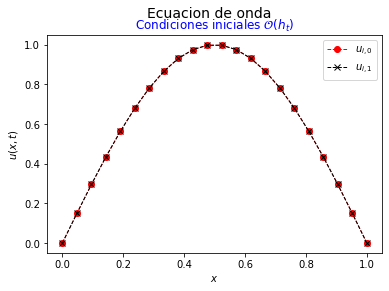

In [4]:
x = np.linspace(0,L,N+2)   # Coordenadas  de la  malla

u = f(x)                      # Condicion  inicial
w = condicionesIniciales(lamb , ht, u, x, op=1) # Euler :op = 1
plt.suptitle('Ecuacion de onda', fontsize =14)
plt.plot(x, u,'ro--', lw = 1, label = "$u_{i,0}$")
plt.plot(x, w,'kx--', lw = 1, label = "$u_{i,1}$")
plt.title('Condiciones iniciales $\mathcal{O}(h_t)$', color='blue', fontsize =12)
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.legend()
plt.savefig('condicion_O1.pdf')
plt.show()

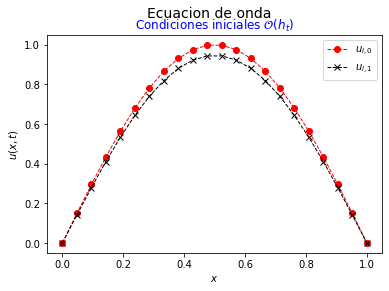

In [5]:
x = np.linspace(0,L,N+2)   # Coordenadas  de la  malla
u = f(x)                      # Condicion  inicial
w = condicionesIniciales(lamb , ht, u, x, op=2) # Euler :op = 1
plt.suptitle('Ecuacion de onda', fontsize =14)
plt.plot(x, u,'ro--', lw = 1, label = "$u_{i,0}$")
plt.plot(x, w,'kx--', lw = 1, label = "$u_{i,1}$")
plt.title('Condiciones iniciales $\mathcal{O}(h_t)$', color='blue', fontsize =12)
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.legend()
plt.savefig('condicion_O3.pdf')
plt.show()

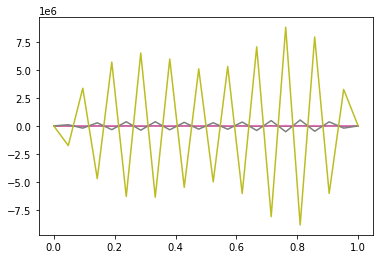

In [6]:
w = condicionesIniciales(lamb , ht, u, x, op = 1) # Euler :op = 1
s = solver(u, w, N, x, Nt, lamb)

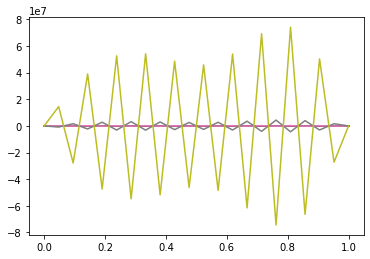

In [7]:
w = condicionesIniciales(lamb , ht, u, x, op = 2) # Euler :op = 1
s = solver(u, w, N, x, Nt, lamb)

Sin embargo, estas dos últimas soluciones nos muestran que para este método más incógnitas son detrimentales, ya que el método funciona de la manera adecuada hasta un $N=12$, como se ve en la siguiente celda:

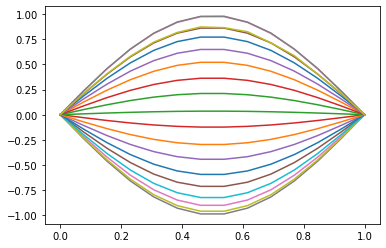

In [8]:
#Código
L = 1           # Longitud  del  dominio
N = 12          # Numero  de  incognitas  internas
Tmax = 1.0     # Tiempo  maximo  de  simulacion
ht = 0.05      # Paso de  tiempo
alpha = 2      # Dato  fisico
h = L / (N+2) # Tamanio  de la malla  espacial
Nt = int(Tmax / ht)     # Numero  total  de  pasos
lamb = alpha * ht / h   # Parametro  lambda
Tmax = Nt * ht           # Tiempo  total  de  simulacion
x = np.linspace(0,L,N+2)   # Coordenadas  de la  malla
u = f(x)                      # Condicion  inicial
w = condicionesIniciales(lamb , ht, u, x, op = 2) # Euler :op = 1
s = solver(u, w, N, x, Nt, lamb)

Iteraciones posteriores con mayor número de incógnitas que esta, nos muestran un comportamiento errático de la cuerda. Por ejemplo con $N=13$

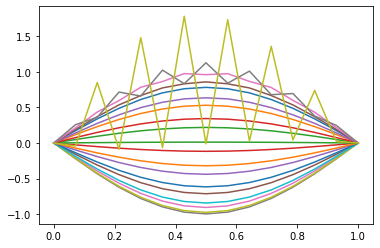

In [9]:
#Código
L = 1           # Longitud  del  dominio
N = 13          # Numero  de  incognitas  internas
Tmax = 1.0     # Tiempo  maximo  de  simulacion
ht = 0.05      # Paso de  tiempo
alpha = 2      # Dato  fisico
h = L / (N+2) # Tamanio  de la malla  espacial
Nt = int(Tmax / ht)     # Numero  total  de  pasos
lamb = alpha * ht / h   # Parametro  lambda
Tmax = Nt * ht           # Tiempo  total  de  simulacion
x = np.linspace(0,L,N+2)   # Coordenadas  de la  malla
u = f(x)                      # Condicion  inicial
w = condicionesIniciales(lamb , ht, u, x, op = 2) # Euler :op = 1
s = solver(u, w, N, x, Nt, lamb)